Saved all simulations to all_sims.jld2
Saved figure as deltaT_Run 2_minus_Run 4 (Base).png
Saved figure as deltaT_Run 5_minus_Run 4 (Base).png
Saved figure as deltaT_Run 8_minus_Run 4 (Base).png
Saved figure as deltaT_Run 1_minus_Run 4 (Base).png
Saved figure as deltaT_Run 6_minus_Run 4 (Base).png
Saved figure as deltaT_Run 7_minus_Run 4 (Base).png
Saved figure as deltaT_Run 3_minus_Run 4 (Base).png
Saved figure as deltaT_Run 9_minus_Run 4 (Base).png


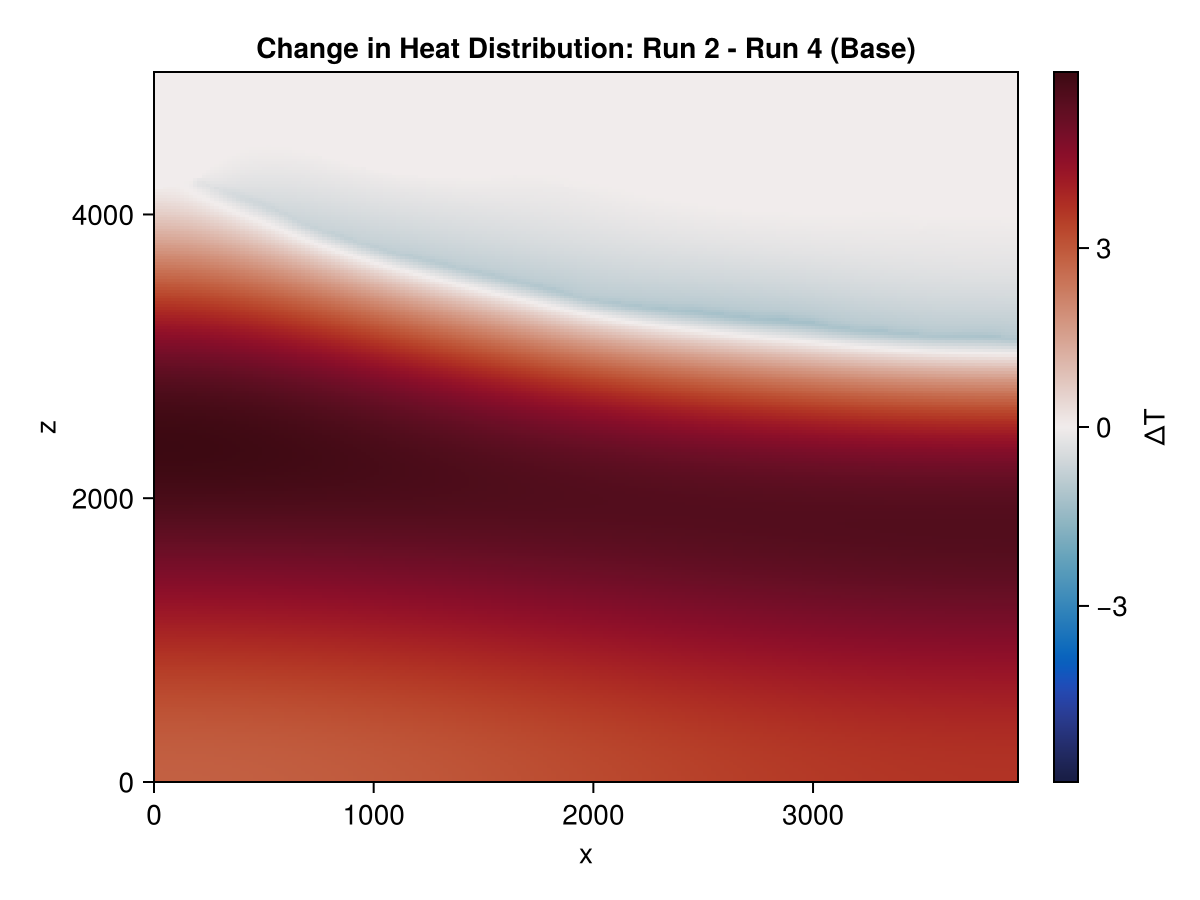

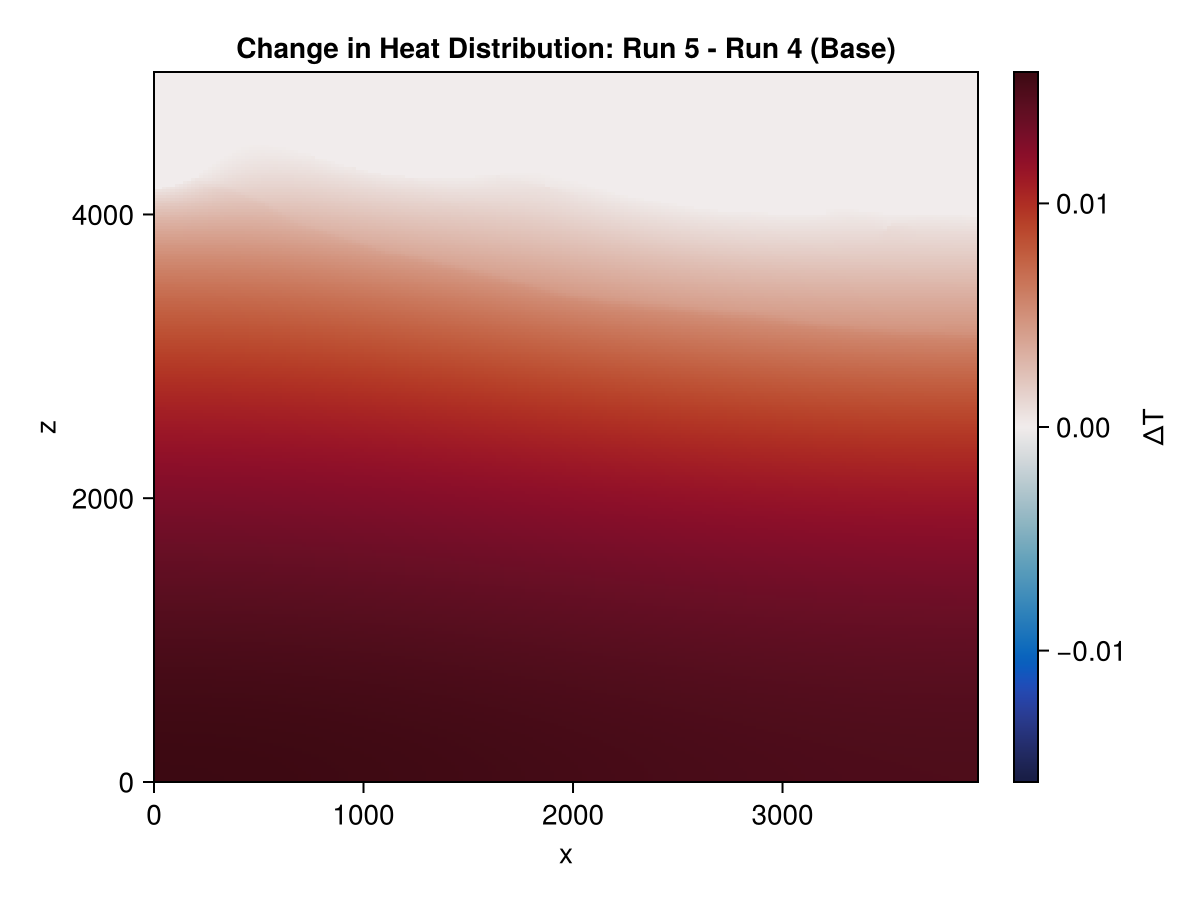

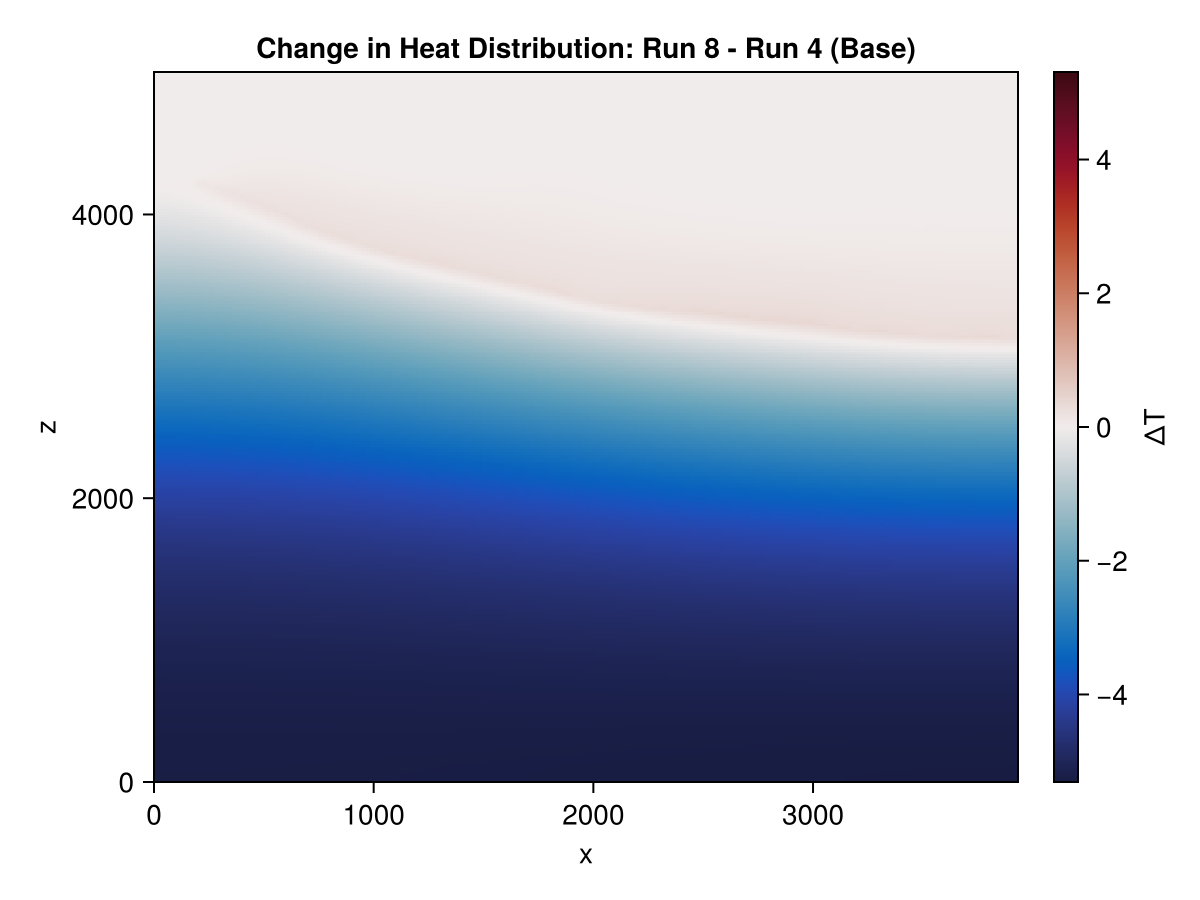

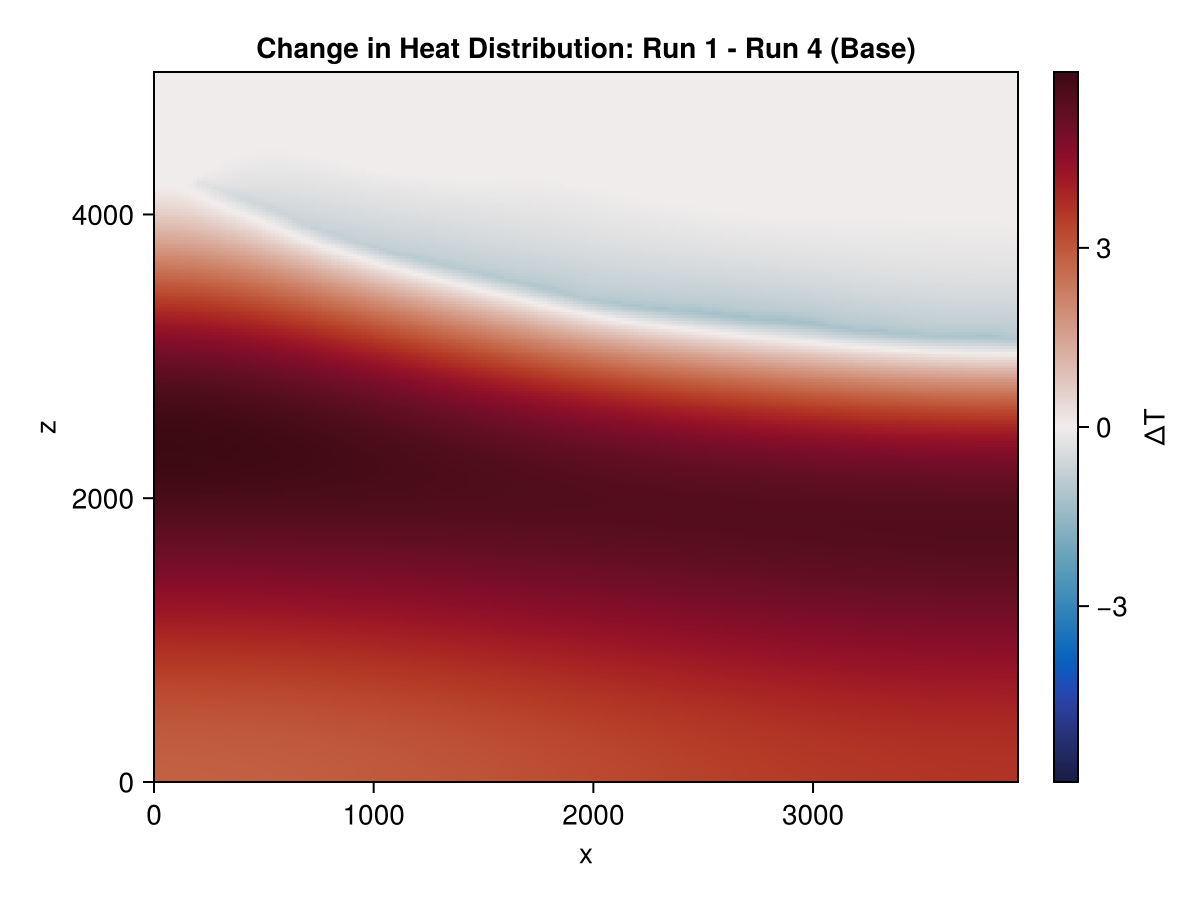

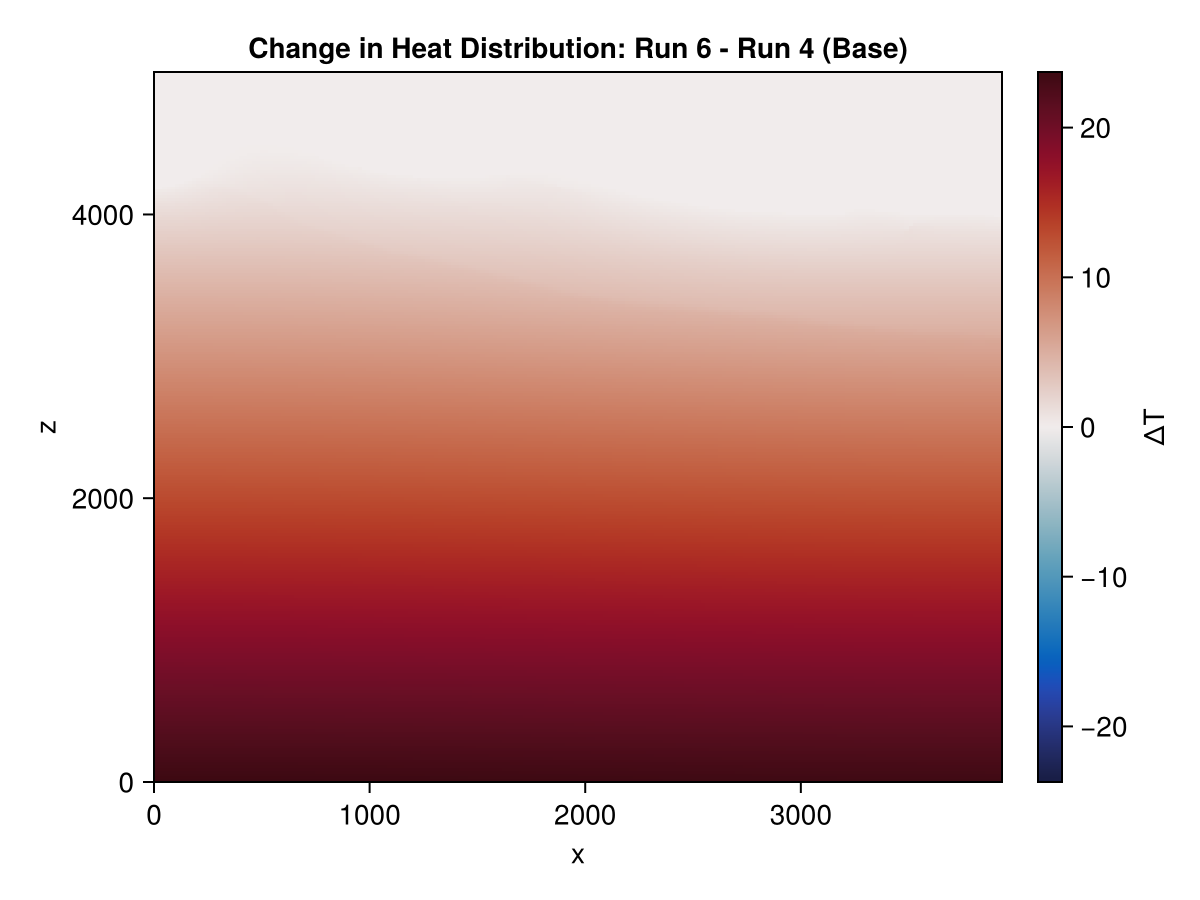

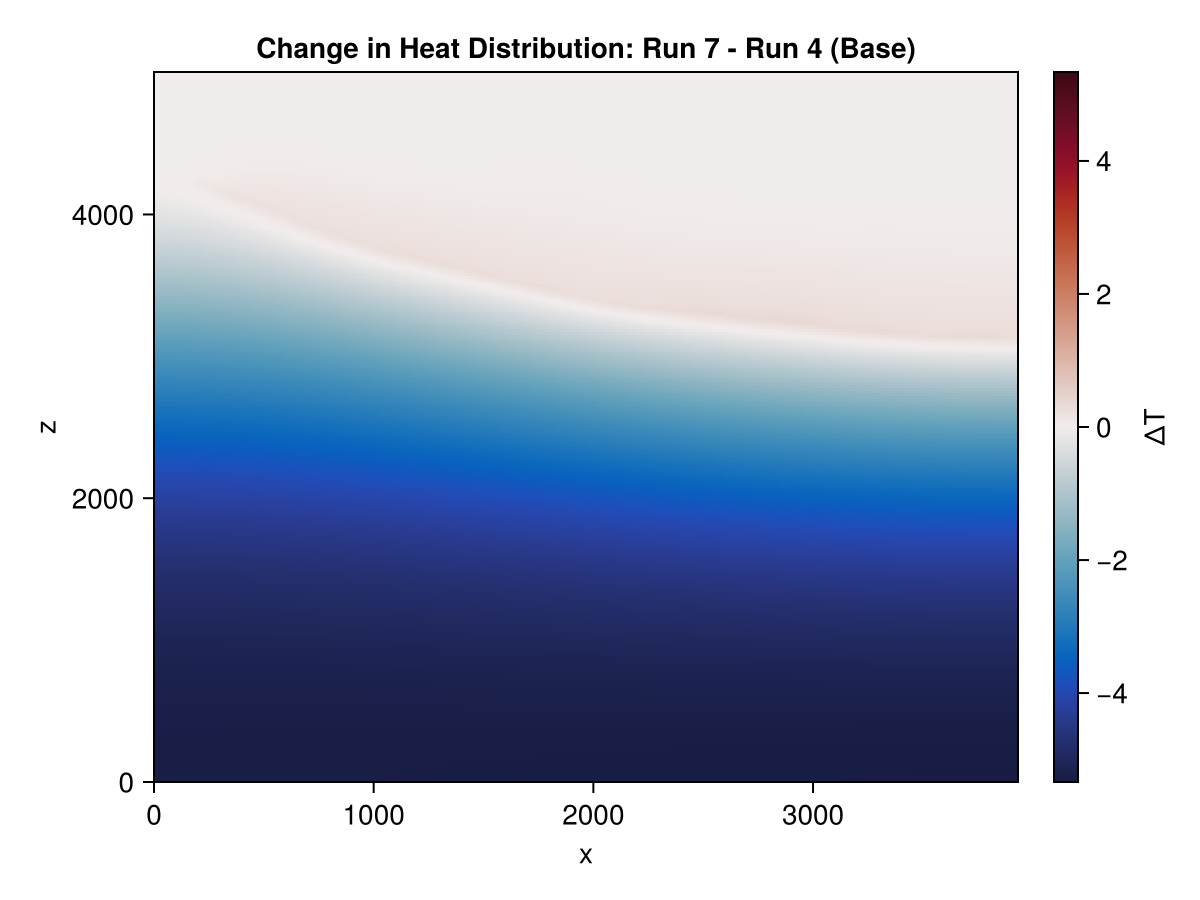

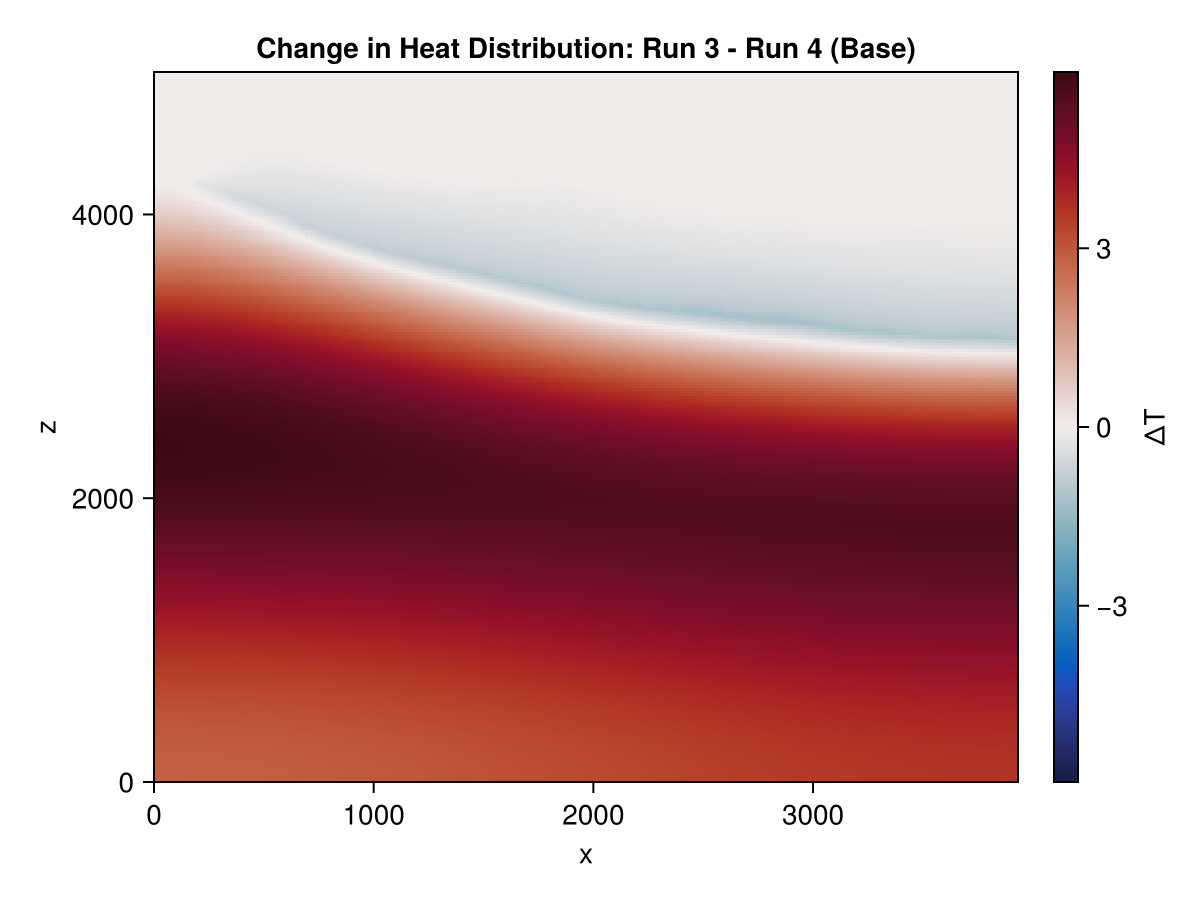

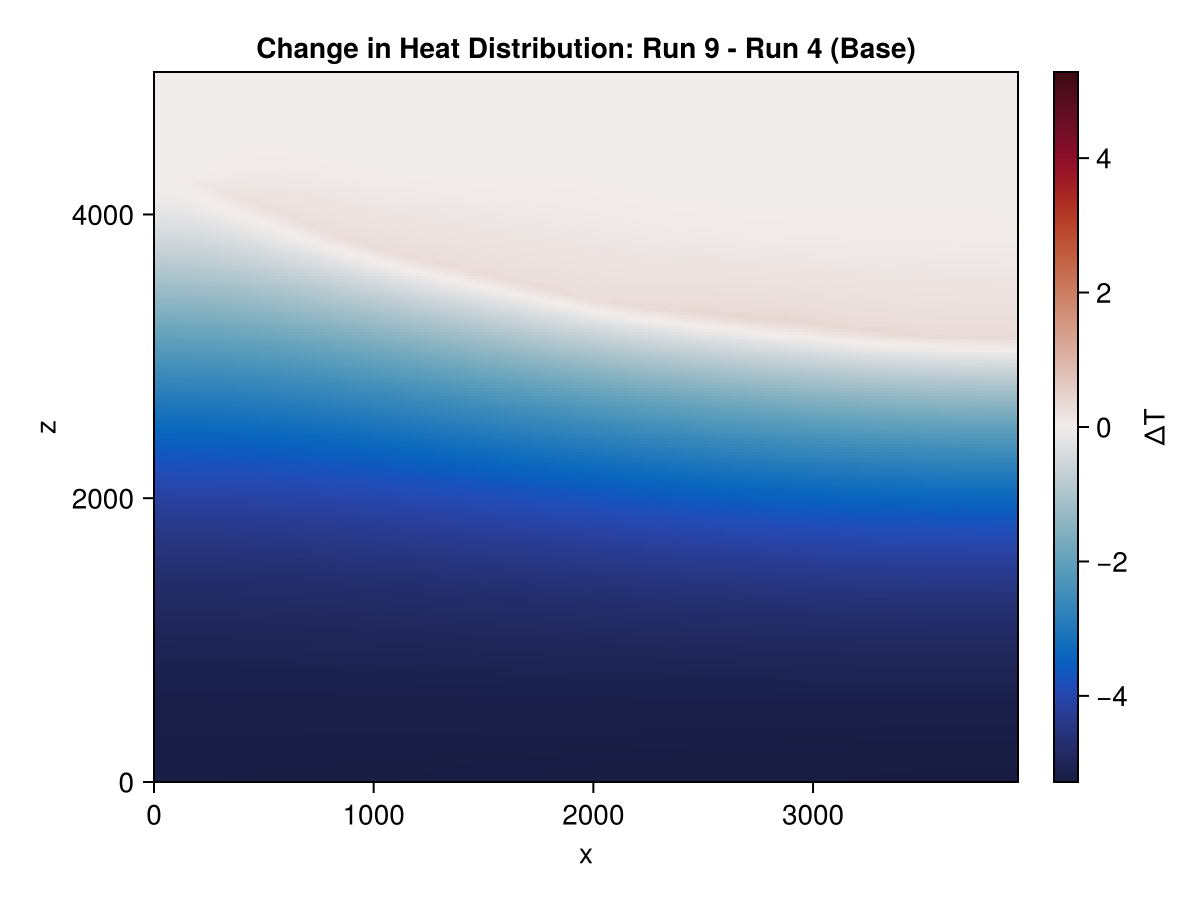

In [38]:
using CSV, DataFrames, JLD2, CairoMakie

#set up a dictionary of the csv files 
sim_files = Dict(
    "Run 4 (Base)" => "H:/Dissertation Code/FinalTempsBaseVals200resDATA.csv",
    "Run 5"       => "H:/Dissertation Code/FinalTempsBaseRho_20IncHr_DATA.csv",
    "Run 6"       => "H:/Dissertation Code/FinalTempsBaseRho_40IncHr_DATA.csv",
    "Run 2"       => "H:/Dissertation Code/FinalTempsIncRho_20IncHr_DATA.csv",
    "Run 3"       => "H:/Dissertation Code/FinalTempsIncRho_40IncHr_DATA.csv",
    "Run 1"       => "H:/Dissertation Code/FinalTempsIncRho_BaseHr_DATA.csv",
    "Run 8"       => "H:/Dissertation Code/Extra run scripts/FinalTempsLOWRho_20IncHr_DATA.csv",
    "Run 9"       => "H:/Dissertation Code/Extra run scripts/FinalTempsLOWRho_40IncHr_DATA.csv",
    "Run 7"       => "H:/Dissertation Code/Extra run scripts/FinalTempsLOWRho_BASEHr_DATA.csv"
)

#identify the base run file so that all of the other runs can be compared to it 
baseline_sim = "Run 4 (Base)"

# create a dictionary to store temperature data for each simulation 
temps = Dict{String, Matrix{Float64}}()

# initialize from first file 
first_name, first_file = first(sim_files)
df = CSV.read(first_file, DataFrame)
x_vals = sort(unique(df.x))
z_vals = sort(unique(df.z))
nx, nz = length(x_vals), length(z_vals)
temps[first_name] = reshape(df.Temperature, (nx, nz))

# load all the other files 
for (name, filepath) in Iterators.drop(sim_files, 1) #iterate over pairs of names and filepaths, but exclude the base one 
    df = CSV.read(filepath, DataFrame)
    T = reshape(df.Temperature, (nx, nz))
    temps[name] = T #store the temperature of each simulation with its name as the key   
end

#save as jld2 for plotting 
@save "all_sims.jld2" x_vals z_vals temps
println("Saved all simulations to all_sims.jld2")

function plot_difference(simA::String, simB::String)
    T1 = temps[simA]
    T2 = temps[simB]
    deltaT = T2 .- T1

    fig = Figure()
    ax = Axis(fig[1,1], xlabel="x", ylabel="z",
              title="Change in Heat Distribution: $simB - $simA")

    
    hm = heatmap!(ax, x_vals, z_vals, reverse(deltaT, dims =2);
                  colormap=:balance,
                  colorrange=(-maximum(abs, deltaT), maximum(abs, deltaT)))
    Colorbar(fig[1,2], hm, label="ΔT")

    #save figures 
    filename = "deltaT_$(simB)_minus_$(simA).png"
    save(filename, fig)

    display(fig)
end

#pass each simulation into the function with the base one 
for sim in keys(temps)
    if sim != baseline_sim #ensure that there is no base-base case
        plot_difference(baseline_sim, sim)
    end
end
